# Plot single-cell doubling times

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# Setup
sns.set(style="white", font="Helvetica")
sns.set_palette(['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91'])
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

### Load single-cell data

#### Using CSV

In [ ]:
csv_path = "../data/single_cell_df.csv"
df pd.read_csv(csv_path)

#### Using Zarr

In [ ]:
# Load from zarr or pickle
zarr_path = "../data/single_cell_df.zarr"
df = pd.read_zarr(zarr_path) 

#### Filter out unreliable tracks


In [ ]:
df = df[df['r2'] > 0.7]

### Plot individual growth dynamics graph
To inspect the doubling time quantification

In [ ]:
# Choose a subset to plot
example_ids = df['ID'].dropna().unique()[:6]

# Plot
for ID in tqdm(example_ids, desc="Plotting growth curves"):
    sc_df = df[df['ID'] == ID].sort_values(by='Time Model (hours)')

    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=sc_df, x='Time (hours)', y='Mtb Area Processed (µm)', label='Processed', s=10)
    sns.lineplot(data=sc_df, x='Time Model (hours)', y='Mtb Area Model (µm)', label='LOWESS Fit')

    plt.title(f"Cell ID: {ID} | r² = {sc_df['r2'].iloc[0]:.2f}")
    plt.xlabel("Time (hours)")
    plt.ylabel("Mtb Area (µm²)")
    plt.grid(False)
    sns.despine(offset=10)
    plt.tight_layout()
    plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from tempfile import NamedTemporaryFile
import imageio
import skimage.transform

# Set plotting aesthetics
sns.set(style="white", font="Helvetica")
sns.set_palette("muted")
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

# Colour scheme
expanded_piyg = ['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91']

# One-cell plotting block
ID = "your-cell-id"
sc_df = df[df['ID'] == ID].dropna(subset=[
    'Time Model (hours)', 'Mtb Area Model (µm)', 'Mtb Area Processed (µm)'])
sc_df = sc_df.sort_values(by='Time Model (hours)')

strain, compound, concentration = sc_df[['Strain', 'Compound', 'Concentration']].iloc[0]
### TODO: read R2 from previously calculated
r2 = round(r2_score(sc_df['Mtb Area Processed (µm)'], sc_df['Mtb Area Model (µm)']), 2)

min_value = max(sc_df['Mtb Area Model (µm)'].round(1).min(), 1.92)
max_value = sc_df['Mtb Area Model (µm)'].round(1).max()

min_idx = sc_df['Mtb Area Model (µm)'].idxmin()
max_idx = sc_df['Mtb Area Model (µm)'].idxmax()

N_series = []
if max_idx > min_idx:
    N_i = min_value
    while N_i <= max_value:
        N_series.append(N_i)
        N_i *= 2
else:
    N_i = max_value
    while N_i >= min_value:
        N_series.append(N_i)
        N_i /= 2

if len(N_series) < 2:
    print(f"No population doubling for ID {ID}")

doubling_time_indices = np.clip(
    np.searchsorted(sc_df['Mtb Area Model (µm)'], N_series), 0, len(sc_df) - 1)
doubling_time_points = sc_df['Time Model (hours)'].iloc[doubling_time_indices]
doubling_times = doubling_time_points.diff().dropna().values.tolist()

plt.figure(figsize=(8, 6))
plt.plot(sc_df['Time Model (hours)'], sc_df['Mtb Area Model (µm)'], label='LOWESS Fit', color=expanded_piyg[-2])
plt.scatter(sc_df['Time Model (hours)'], sc_df['Mtb Area Processed (µm)'], label='Processed Data', color=expanded_piyg[0], s=5)

for i, (time, population) in enumerate(zip(doubling_time_points, N_series)):
    time = abs(time)
    population = abs(population)
    color = expanded_piyg[i % len(expanded_piyg)]
    plt.axvline(x=time, color=color, linestyle='--', linewidth=1, alpha=0.5)
    plt.axhline(y=population, color=color, linestyle='--', linewidth=1, alpha=0.5)

    if i > 0:
        previous_time = doubling_time_points.iloc[i - 1]
        gap = time - previous_time
        fontsize = max(8, min(12, gap))
        plt.text(time, population + population * 0.01, f'{abs(doubling_times[i - 1]):.2f}h',
                 ha='right', va='bottom', fontsize=fontsize, color=color, alpha=0.5)
        deltaMtb = population - N_series[i - 1]
        plt.text(time + 0.1, population - max_value * 0.01, f'Δ {abs(deltaMtb):.1f}µm²',
                 fontsize=fontsize, color=color, ha='left', va='top', rotation=270, alpha=0.5)

plt.xlabel('Time (Hours)')
plt.ylabel('Mtb Area µm$^2$')
plt.title(f'Cell ID {ID} | Strain: {strain} | Compound: {compound} | Concentration: {concentration} | R² = {r2}', fontsize=12)
plt.suptitle('Single-Macrophage Intracellular Mtb Dynamics', weight='bold', fontsize=16)
plt.legend()
sns.despine(offset=10)
plt.tight_layout()
plt.show()


329.6.4.PS0000


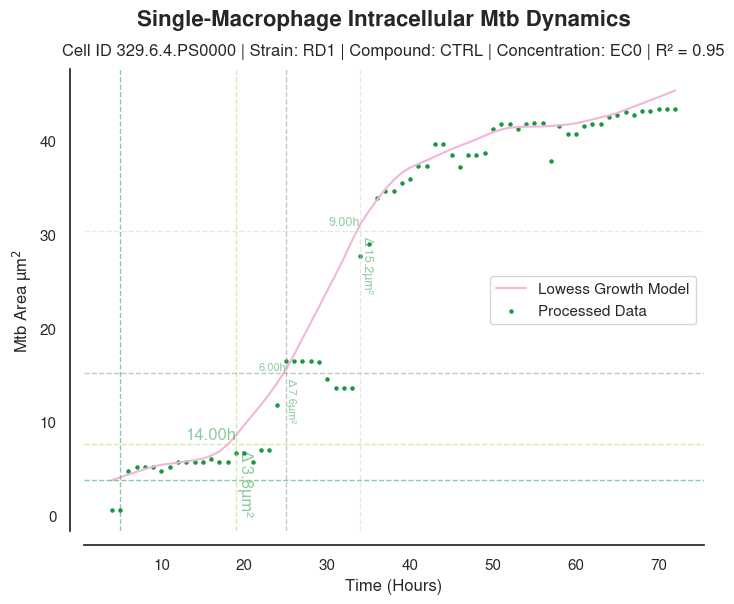

329.6.4.PS0000


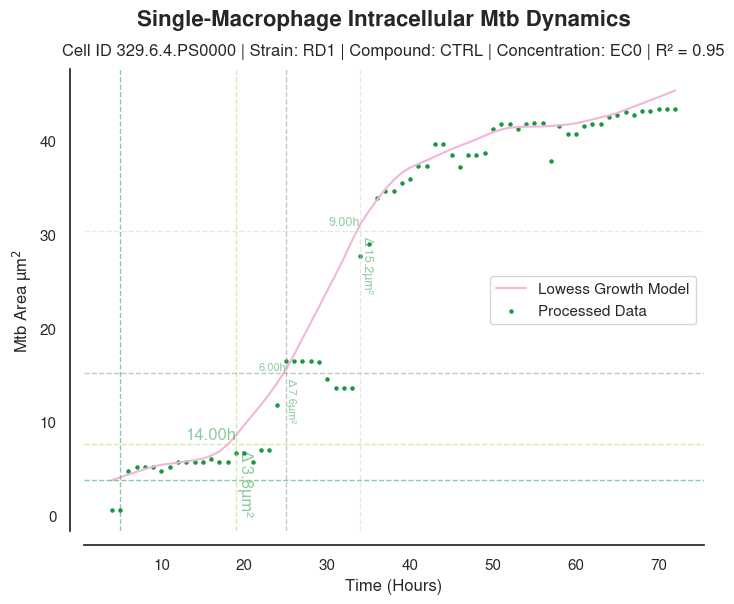

706.3.4.PS0000


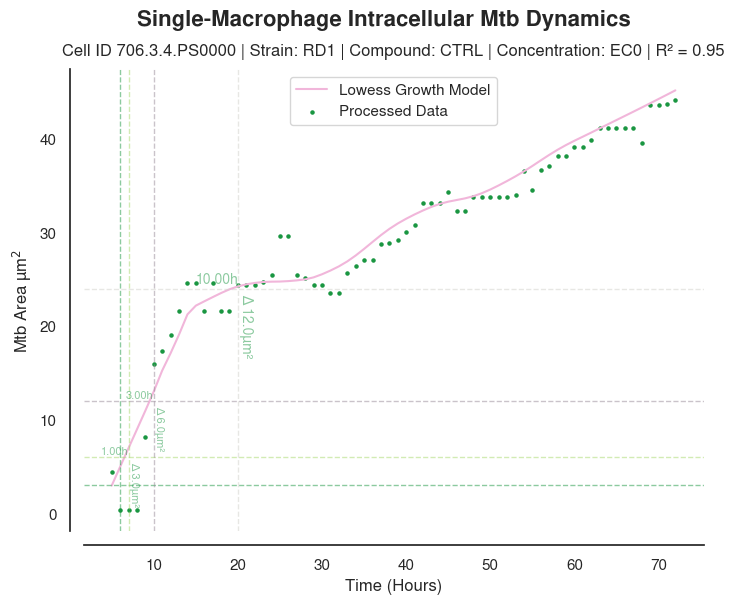

706.3.4.PS0000


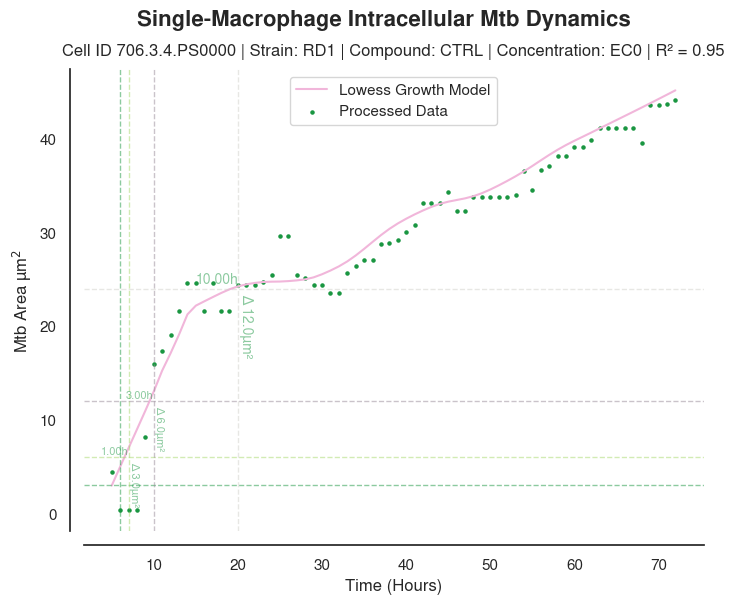

In [96]:
for i, ID in enumerate(subset_df[subset_df['Doubling Times'] < 10].ID.values):

    print(ID)    

    plot(ID, df, save = False, napari = False)

# Plot all intracellular single-cell growth dynamics
As a series of colour coded line graphs

  0%|          | 0/1795 [00:00<?, ?it/s]

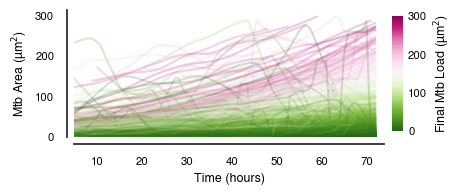

In [147]:
# Import necessary modules
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

# Constants for figure size
fig_width_mm = 122.365
fig_width_inch = fig_width_mm / 25.4
fig_height_mm = 42
fig_height_inch = fig_height_mm / 25.4

# Define the colormap using 'PiYG_r'
cmap = plt.get_cmap('PiYG_r')

# Create the plot
plt.figure(figsize=(fig_width_inch, fig_height_inch))

# Iterate over the unique IDs in the subset DataFrame and plot
subset_df = df[(df['Compound'] == 'CTRL')
               & (df['Strain'] == 'WT') 
               & (df['mtb_origin'] != 'Junk')
            # & (df['mtb_origin'] == 'Growth')

# & (df['r2'] >=0.7)
              ]

for ID in tqdm(subset_df['ID'].unique(), total=len(subset_df['ID'].unique())):
    sc_df = subset_df[subset_df['ID'] == ID]
    time_model = sc_df['Time Model (hours)'].dropna().values
    population_model = sc_df['Mtb Area Model (µm)'].dropna().values

    # Filter based on max population value
    max_value = np.nanmax(population_model)
    if max_value < 4 or max_value > 300:
        continue

    # Calculate the color value based on the third-last value of the population model
    colour_value = population_model[-1]

    # Normalize the average value to the range [0, 1] for the colormap
    norm = mpl.colors.Normalize(vmin=0, vmax=300)
    color = cmap(norm(colour_value))

    # Plot the data with the corresponding color
    plt.plot(time_model, population_model, color=color, alpha=0.2)

# Set labels and limits
plt.xlabel('Time (hours)')
plt.ylabel('Mtb Area (µm$^2$)')
plt.ylim(bottom=0)
sns.despine(offset=5)
plt.xlim(5, 74)

# Create a wider color bar to the right of the plot
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for color bar
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', pad=0.02, aspect=10, shrink=0.9)  # Adjust width with aspect and shrink
cbar.set_label('Final Mtb Load (µm$^2$)')
cbar.ax.tick_params(size=0)

# Remove the black border (outline) of the color bar
cbar.outline.set_visible(False)

# Save the plot
plt.savefig(os.path.join(output_dir, 'WT_notjunk_many_sc_plot_filtered_col_final_val_with_wider_colorbar.pdf'), bbox_inches='tight', dpi=314)


# Plot distribution of doubling times
Under different antibiotic conditions and Mtb strains

/tmp/ipykernel_894048/21637500.py:38: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


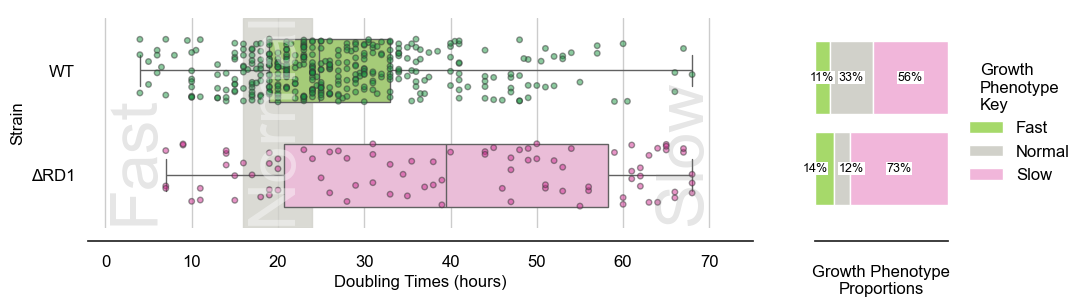

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # For float('inf')

# Input figure size in millimeters
width_mm = 280  # for example, 180 mm
height_mm = 100  # for example, 80 mm

# Convert millimeters to inches (1 inch = 25.4 mm)
width_in = width_mm / 25.4
height_in = height_mm / 25.4

# Step 1: Bin the Doubling Times into categories (from your original code)
bins = [0, 16, 24, float('inf')]
bin_labels = ['Fast', 'Normal', 'Slow'] # Using 'bin_labels' for clarity
subset_df['Growth Category'] = pd.cut(subset_df['Doubling Times'], bins=bins, labels=bin_labels, right=False)

# Determine a practical upper x-limit for the boxplot, similar to original implications
plot_x_max = 75 
plot_x_min = -2 

# Create the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(width_in, height_in/1.25), 
                         gridspec_kw={'width_ratios': [5, 1]}) # Adjust ratios as needed
ax_boxplot = axes[0]
ax_barchart = axes[1]

# --- Plot 1: Boxplot and Stripplot (on ax_boxplot) ---

# Step 2: Plot the boxplot and stripplot (adapted from your original code)
sns.boxplot(
    data=subset_df, x="Doubling Times", y="Strain", hue="Strain",
    whis=[0, 100], width=.6, palette=[expanded_piyg[-2], expanded_piyg[1]],
    ax=ax_boxplot, legend=False # Legend will be handled by stripplot or manually if needed
)

sns.stripplot(
    data=subset_df, x="Doubling Times", y="Strain", size=4, hue="Strain",
    palette=[expanded_piyg[-1], expanded_piyg[0]], alpha=0.5,
    edgecolor='gray', linewidth=1, jitter=0.3,
    ax=ax_boxplot
)

# Consolidate legend for Strain from stripplot
handles, legend_labels_raw = ax_boxplot.get_legend_handles_labels()
unique_legend_items = {}
for handle, label_text in zip(handles, legend_labels_raw):
    if label_text not in unique_legend_items:
        unique_legend_items[label_text] = handle
# ax_boxplot.legend(unique_legend_items.values(), unique_legend_items.keys(), title="Strain", loc='lower right')


# Step 5 (from original): Adjust y-limits and labels for boxplot
ax_boxplot.set_ylim(-0.5, 1.5)
# Assuming 'RD1' is a strain name that might need replacement. Adapt as necessary.
if 'RD1' in subset_df['Strain'].unique():
    replace_ytick_labels(ax_boxplot, old_label='RD1', new_label='ΔRD1')

# Add shaded regions for each growth category
ax_boxplot.axvspan(0, 16, color=expanded_piyg[3], alpha=0, label='Fast (<20h)')
ax_boxplot.axvspan(16, 24, color=expanded_piyg[3], alpha=0.8, label='Normal (20-28h)')
ax_boxplot.axvspan(24, 70, color=expanded_piyg[3], alpha=0., label='Slow (>28h)')

# Step 6: Add vertical text labels within each category region
ax_boxplot.text(0, -0.35, 'Fast', fontsize=48, color='gray', alpha=0.2, ha='left', va='baseline', rotation=90)
ax_boxplot.text(16, -0.35, 'Normal', fontsize=48, color='white', alpha=0.4, ha='left', va='baseline', rotation=90)
ax_boxplot.text(70.5, -0.35, 'Slow', fontsize=48, color='gray', alpha=0.2, ha='right', va='baseline', rotation=90)


# Final tweaks for boxplot (from your original code)
ax_boxplot.xaxis.grid(True)
ax_boxplot.set_xlim(plot_x_min, plot_x_max) # Set x-limits for boxplot
# ax_boxplot.set_title('Doubling Times by Strain')
ax_boxplot.set_xlabel('Doubling Times (hours)') # Added X label for clarity
sns.despine(ax=ax_boxplot, offset=10, left=True)


# --- Plot 2: Horizontal Bar Chart for Percentages (on ax_barchart) ---

# Calculate percentages (adapted from your original Step 4)
total_counts = subset_df.groupby(['Strain', 'Growth Category'], observed=True).size()
# Use groupby.size() for strain_totals for consistency with categorical data
strain_totals = subset_df.groupby('Strain', observed=True).size() 

percentage_df_list = []
# Get actual strains present in the data to iterate over
# Ensures that strains not in data (if subsetting occurred) aren't processed incorrectly
plot_strains = subset_df['Strain'].unique() 

for strain_val in plot_strains:
    if strain_totals.get(strain_val, 0) > 0: # Check if strain has any counts
        for category_val in bin_labels: # Use the defined bin_labels for specific order
            count = total_counts.get((strain_val, category_val), 0)
            percentage = (count / strain_totals[strain_val]) * 100
            percentage_df_list.append({'Strain': strain_val, 
                                       'Growth Category': category_val, 
                                       'Percentage': percentage})
    # Optionally, handle strains with no data if they should appear with 0%
    # else:
    #     for category_val in bin_labels:
    #         percentage_df_list.append({'Strain': strain_val, 'Growth Category': category_val, 'Percentage': 0})


percentage_df = pd.DataFrame(percentage_df_list)
percentage_pivot = percentage_df.pivot(index='Strain', columns='Growth Category', values='Percentage').fillna(0)

# Ensure the order of categories (columns) in the bar chart matches bin_labels
percentage_pivot = percentage_pivot[bin_labels]

# Match strain order and labels with the boxplot for consistency
# Get strain order from boxplot y-axis (these are typically ordered bottom-to-top as plotted)
boxplot_yticklabels_text = [label.get_text() for label in ax_boxplot.get_yticklabels()]

# Map these display names back to original names found in percentage_pivot.index
# This mapping logic needs to be robust or based on a predefined map if names are complexly transformed
original_strain_names_ordered_for_pivot = []
for display_name in boxplot_yticklabels_text:
    # Example mapping, adapt if your strain names and replacements differ
    if display_name == 'ΔRD1' and 'RD1' in percentage_pivot.index: 
        original_strain_names_ordered_for_pivot.append('RD1')
    elif display_name in percentage_pivot.index:
        original_strain_names_ordered_for_pivot.append(display_name)
    # Add more elif conditions here if you have other specific label replacements
    # else: This strain is on boxplot but not in percentage_pivot data or vice-versa.
    #       This might indicate an issue or require a placeholder.

# Reorder pivot table to match boxplot's y-axis presentation
# Ensure all strains in original_strain_names_ordered_for_pivot are actually in percentage_pivot.index
# and that lengths match to avoid reindexing with missing labels.
valid_ordered_strains = [s for s in original_strain_names_ordered_for_pivot if s in percentage_pivot.index]

# Only reindex if the set of strains is identical, otherwise use pivot's default order to avoid errors
if (len(valid_ordered_strains) == len(percentage_pivot.index) and 
    set(valid_ordered_strains) == set(percentage_pivot.index.tolist())):
    percentage_pivot_ordered = percentage_pivot.reindex(valid_ordered_strains)
else:
    # If orders/names can't be matched (e.g. a strain on boxplot is missing from pivot data)
    # print("Warning: Could not fully match strain order for bar chart. Using default pivot table order.")
    percentage_pivot_ordered = percentage_pivot # Fallback to current order

# Plot horizontal bar chart
bar_colors = [expanded_piyg[1], expanded_piyg[3], expanded_piyg[-2]] # Choose distinct colors for bars
percentage_pivot_ordered.plot(kind='barh', stacked=True, ax=ax_barchart, color=bar_colors, width=0.8)

# Set X-axis label and limit
ax_barchart.set_xlabel('\nGrowth Phenotype\nProportions')
ax_barchart.set_xlim(0, 100)

# Remove X-axis ticks (as per previous request)
ax_barchart.set_xticks([])

# --- Lines to ensure Y-axis is completely removed ---
ax_barchart.set_ylabel('')      # Remove Y-axis title/label
ax_barchart.set_yticks([])      # Remove Y-axis ticks and tick labels
# The line for set_yticklabels is correctly commented out or removed in your version.

# --- ADDED: Add text labels for each percentage on the stacked bars ---
for p in ax_barchart.patches:
    width = p.get_width()
    # Only add text if the segment width (percentage) is large enough to display
    if width > 1.5: # You can adjust this threshold (e.g., > 0 or > 1)
        # Get the coordinates for the text
        x = p.get_x() + width / 2  # Center of the segment horizontally
        y = p.get_y() + p.get_height() / 2 # Center of the segment vertically
        if f'{width:.0f}' == '12':
            x += 7
        if f'{width:.0f}' == '14':
            x -= 7
        # Add the text
        ax_barchart.text(x, y,
                         f'{width:.0f}%', # Format as integer percentage
                         ha='center',      # Horizontal alignment
                         va='center',      # Vertical alignment
                         fontsize=9,       # Adjust font size as needed
                         color='black',
                         bbox=dict(facecolor='white', edgecolor='none', pad=0.5)) # Add white background box
    # Adjust color for contrast with bar segments
                                           # (e.g., 'white' if bars are dark)
# --- End of added text labels ---
# Legend (as in your snippet)
ax_barchart.legend(title='Growth\nPhenotype\nKey', loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)

# Despine (as in your snippet) - this removes top and right spines by default
# and bottom spine if bottom=True is specified (not done here, so bottom spine may remain if x-ticks are removed but spine not explicitly).
sns.despine(ax=ax_barchart, offset=10) # If you also want to remove the bottom X-axis line, add bottom=True
# e.g., sns.despine(ax=ax_barchart, offset=10, bottom=True)
ax_barchart.spines['left'].set_visible(False) # Remove the Y-axis spine (line)

# --- Final Adjustments ---
plt.tight_layout(w_pad=3.0) # Adjust w_pad for spacing between subplots

# Save the figure (uncomment and adjust path as needed from your original code)
# plt.savefig('/mnt/OPERA2/Nathan/macrohet_syno/results/growth_rate/intrinsic_growth_dts_boxplot.pdf', bbox_inches='tight', dpi=314)
plt.savefig('/home/dayn/intrinsic_growth_dts_boxplot.pdf', bbox_inches='tight', dpi=314)

plt.show()

### Plot doubling times distributions
According to manual classification of Mtb growth phenotype

/tmp/ipykernel_70986/2761496271.py:30: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


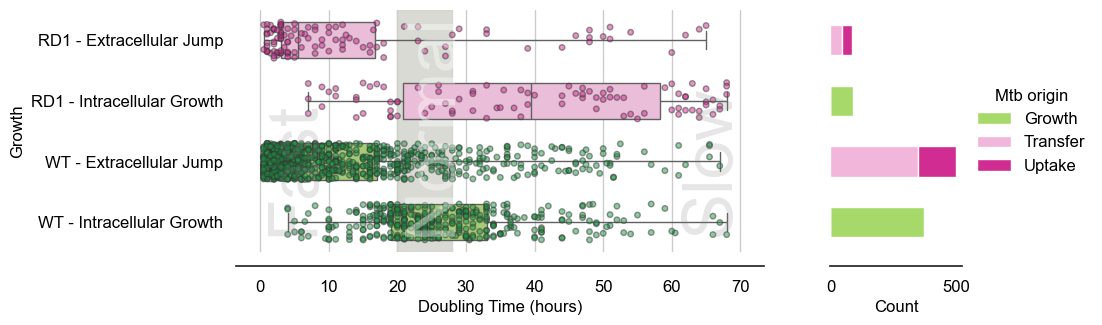

In [48]:
import matplotlib.gridspec as gridspec

# Step 1: Bin the Doubling Times into categories
bins = [0, 20, 28, float('inf')]  # Define the bins: <20, 20-24, >24
labels = ['Fast', 'Normal', 'Slow']  # Labels for each bin
subset_df['Growth Category'] = pd.cut(subset_df['Doubling Times'], bins=bins, labels=labels, right=False)

# Define the desired order of categories
order = ['RD1 - Extracellular Jump', 'RD1 - Intracellular Growth', 
         'WT - Extracellular Jump', 'WT - Intracellular Growth']

# Update y-axis to reflect segregation by mrb_origin
subset_df['Growth'] = subset_df.apply(
    lambda row: f"{row['Strain']} - Intracellular Growth" if row['mtb_origin'] == 'Growth' 
                else f"{row['Strain']} - Extracellular Jump", axis=1
)

# Create figure and gridspec layout for side-by-side plots
fig = plt.figure(figsize=(width_in, height_in / 1.25))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])  # Wider boxplot on the left, narrower bar chart on the right

# Step 2: Plot the boxplot and stripplot
ax1 = plt.subplot(gs[0])  # First subplot for boxplot and stripplot

sns.boxplot(
    data=subset_df, x="Doubling Times", y="Growth", hue="Strain", 
    whis=[0, 100], width=.6, palette=[expanded_piyg[1], expanded_piyg[-2]], order=order, ax=ax1
)

sns.stripplot(
    data=subset_df, x="Doubling Times", y="Growth", size=4, hue="Strain", 
    palette=[expanded_piyg[0], expanded_piyg[-1]], alpha=0.5, order=order, 
    edgecolor='gray', linewidth=1, jitter=0.3, ax=ax1
)

# Add shaded regions for each growth category
ax1.axvspan(0, 20, color=expanded_piyg[3], alpha=0, label='Fast (<20h)')
ax1.axvspan(20, 28, color=expanded_piyg[3], alpha=0.8, label='Normal (20-28h)')
ax1.axvspan(28, 70, color=expanded_piyg[3], alpha=0., label='Slow (>28h)')

# Add vertical text labels within each category region
ax1.text(0.5, 3, 'Fast', fontsize=50, color='gray', alpha=0.2, ha='left', va='baseline', rotation=90)
ax1.text(20.5, 3, 'Normal', fontsize=50, color='white', alpha=0.4, ha='left', va='baseline', rotation=90)
ax1.text(70.5, 3, 'Slow', fontsize=50, color='gray', alpha=0.2, ha='right', va='baseline', rotation=90)

replace_ytick_labels(ax1, old_label='RD1', new_label='ΔRD1')

# Final tweaks for the first plot
ax1.xaxis.grid(True)
sns.despine(offset=10, left=True)
plt.legend().remove()
ax1.set_xlabel('Doubling Time (hours)')

# Step 3: Plot the bar chart
ax2 = plt.subplot(gs[1])  # Second subplot for bar chart

# Calculate the distribution of mtb_origin for each Growth category
origin_counts = subset_df.groupby(['Growth', 'mtb_origin']).size().unstack(fill_value=0)
del origin_counts['Junk']
del origin_counts['Unknown']
# Plot the bar chart, aligning y-axis with the boxplot
origin_counts = origin_counts.reindex(reversed(order))  # Ensure the same y-order as boxplot
origin_counts.plot(kind='barh', stacked=True, ax=ax2, color=[expanded_piyg[1], expanded_piyg[-2],  expanded_piyg[-1]])

# Final tweaks for the second plot
ax2.set_xlabel('Count')
ax2.set_ylabel('')  # Remove y-axis label
ax2.set_yticklabels([])  # Remove y-tick labels for the bar chart
sns.despine(offset=10, left=True)

# Place the legend outside the plot, to the right
ax2.legend(title='Mtb origin', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Save the figure
# plt.savefig('wt_rd1_dt_filtered_growth_cats_with_bar.pdf', bbox_inches='tight', dpi=314)
plt.show()
